In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_census =pd.read_csv("https://raw.githubusercontent.com/firdthebird/Capstone/master/cbsa-report-chapter-5-data.csv")
df_census = df_census.iloc[6:]
df_census = df_census[(df_census["Geographic area"]=="Austin-Round Rock-San Marcos, TX") \
|  (df_census["Geographic area"]=="Seattle-Tacoma-Bellevue, WA")\
| (df_census["Geographic area"]=="Chicago-Joliet-Naperville, IL-IN-WI")]
df_census

,CBSA Code,Geographic area,Legal/statistical area description,Population by sex,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 72,Unnamed: 73,"Percent change in population by age, 2000 to 2010",Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
28,12420,"Austin-Round Rock-San Marcos, TX",Metropolitan Statistical Area,"1,716,289","860,101",50.1,"856,188",49.9,100.46,"1,249,763",...,"31,604","16,488",37.1,19.7,27.0,22.5,46.0,110.4,63.9,40.0
70,16980,"Chicago-Joliet-Naperville, IL-IN-WI",Metropolitan Statistical Area,"9,461,105","4,622,870",48.9,"4,838,235",51.1,95.55,"9,098,316",...,"58,781","30,625",-2.8,3.0,-2.2,-10.8,16.2,43.1,11.3,6.5
316,42660,"Seattle-Tacoma-Bellevue, WA",Metropolitan Statistical Area,"3,439,809","1,711,982",49.8,"1,727,827",50.2,99.08,"3,043,878",...,"46,885","16,327",5.1,13.8,8.2,-5.3,19.1,65.7,30.1,10.7


In [3]:
df_census.drop(["Geographic area", "Legal/statistical area description"], axis = 1, inplace = True)
df_census =df_census.drop(df_census.columns[0], axis=1)
df_census.replace(',','', regex=True, inplace=True)
df_census

,Population by sex,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 72,Unnamed: 73,"Percent change in population by age, 2000 to 2010",Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
28,1716289,860101,50.1,856188,49.9,100.46,1249763,635067,50.8,614696,...,31604,16488,37.1,19.7,27.0,22.5,46.0,110.4,63.9,40.0
70,9461105,4622870,48.9,4838235,51.1,95.55,9098316,4449377,48.9,4648939,...,58781,30625,-2.8,3.0,-2.2,-10.8,16.2,43.1,11.3,6.5
316,3439809,1711982,49.8,1727827,50.2,99.08,3043878,1516223,49.8,1527655,...,46885,16327,5.1,13.8,8.2,-5.3,19.1,65.7,30.1,10.7


In [4]:
data_scaled = normalize(df_census)
data_scaled = pd.DataFrame(data_scaled, columns=df_census.columns)
data_scaled.head()

,Population by sex,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 72,Unnamed: 73,"Percent change in population by age, 2000 to 2010",Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,0.625592,0.313509,0.000018,0.312083,0.000018,0.000037,0.455542,0.231484,0.000019,0.224058,...,0.011520,0.006010,1.352305e-05,7.180703e-06,9.841573e-06,8.201311e-06,1.676712e-05,0.000040,2.329172e-05,1.458011e-05
1,0.559830,0.273543,0.000003,0.286287,0.000003,0.000006,0.538364,0.263278,0.000003,0.275086,...,0.003478,0.001812,-1.656810e-07,1.775153e-07,-1.301779e-07,-6.390552e-07,9.585828e-07,0.000003,6.686411e-07,3.846166e-07
2,0.582166,0.289742,0.000008,0.292424,0.000008,0.000017,0.515157,0.256611,0.000008,0.258546,...,0.007935,0.002763,8.631429e-07,2.335563e-06,1.387798e-06,-8.969916e-07,3.232555e-06,0.000011,5.094235e-06,1.810908e-06


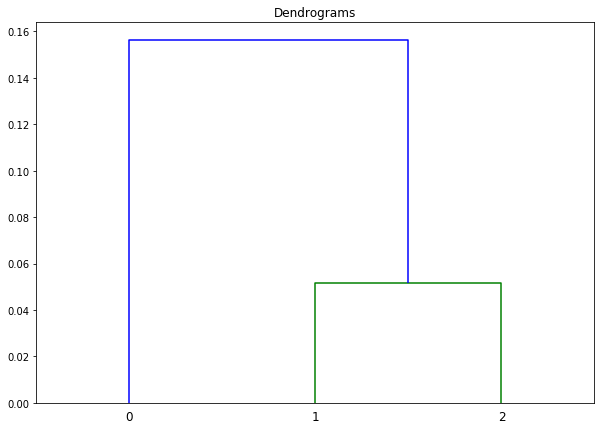

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

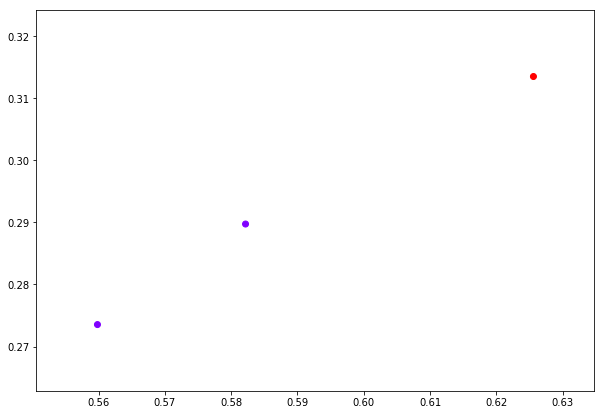

In [6]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))
df =data_scaled.to_numpy()
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')